In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


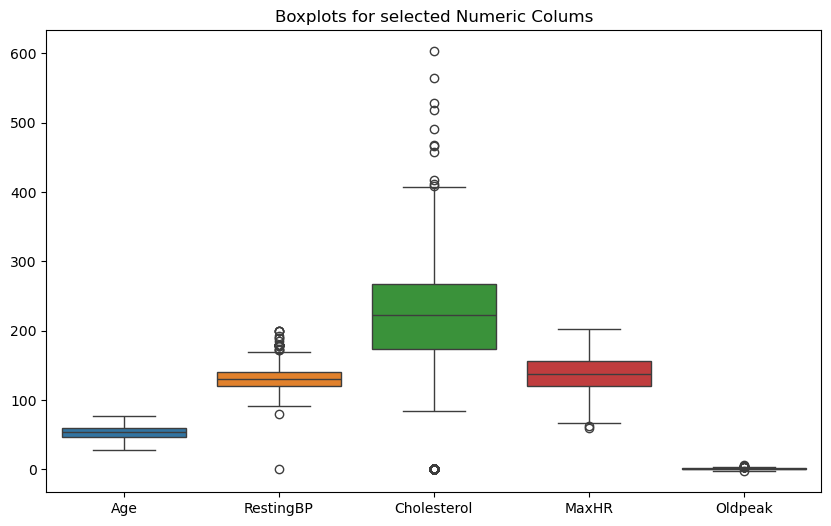

In [67]:
numeric_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots for selected Numeric Colums")
plt.show()

In [68]:
# using IQR method on Cholesterol as an example
col = 'Cholesterol'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df[col]<lower) | (df[col]>upper)]
print(f"Number of detected outliers in {col}: ", len(outliers))

Number of detected outliers in Cholesterol:  183


In [69]:
# remove outliers
df_no_outliers = df[(df[col] >=lower) & (df[col]<=upper)]
print(len(df_no_outliers))

735


In [70]:
# cap outliers replace the lower values will be replaced by lower and upper values will be replaced by upper
df_capped = df.copy()
df_capped[col] = df_capped[col].clip(lower, upper)
df_capped.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [71]:
# log transform
df_log = df.copy()
df_log[col] = np.log(df_log[col]+1)
df_log.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,5.669881,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,5.198497,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,5.648974,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,5.370638,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,5.278115,0,Normal,122,N,0.0,Up,0


#### Feature tranformation

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
# Polynomial features using Age and MaxHR
poly_cols = ['Age','MaxHR']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[poly_cols])
poly_features_name = poly.get_feature_names_out(poly_cols)
print(poly_features_name)
print(poly_features.shape)

['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
(918, 5)


In [74]:
# Binning Age into categories (young, middle, old)
df["Age_bin"] = pd.cut(
    df["Age"],
    bins=[0,30,50,100],
    labels=["Young","Middle","Old"]
)

print(df[['Age','Age_bin']].head(50))

    Age Age_bin
0    40  Middle
1    49  Middle
2    37  Middle
3    48  Middle
4    54     Old
5    39  Middle
6    45  Middle
7    54     Old
8    37  Middle
9    48  Middle
10   37  Middle
11   58     Old
12   39  Middle
13   49  Middle
14   42  Middle
15   54     Old
16   38  Middle
17   43  Middle
18   60     Old
19   36  Middle
20   43  Middle
21   44  Middle
22   49  Middle
23   44  Middle
24   40  Middle
25   36  Middle
26   53     Old
27   52     Old
28   53     Old
29   51     Old
30   53     Old
31   56     Old
32   54     Old
33   41  Middle
34   43  Middle
35   32  Middle
36   65     Old
37   41  Middle
38   48  Middle
39   48  Middle
40   54     Old
41   54     Old
42   35  Middle
43   52     Old
44   43  Middle
45   59     Old
46   37  Middle
47   50  Middle
48   36  Middle
49   41  Middle


In [75]:
# Domain Driven risk categories for Resting BP and Oldpeak
def bp_risk(bp):
    if bp<120:
        return "Normal"
    elif bp<140:
        return "Elevated"
    else:
        return "High"

def oldpeak_risk(op):
    if op==0:
        return "No Stress"
    elif op<2:
        return "Moderate Stress"
    else:
        return "High Stress"
    
df['BP_Risk'] = df["RestingBP"].apply(bp_risk)
df["Oldpeak_Risk"] = df["Oldpeak"].apply(oldpeak_risk)
df[["RestingBP","BP_Risk","Oldpeak","Oldpeak_Risk"]]

,RestingBP,BP_Risk,Oldpeak,Oldpeak_Risk
0,140,High,0.0,No Stress
1,160,High,1.0,Moderate Stress
2,130,Elevated,0.0,No Stress
3,138,Elevated,1.5,Moderate Stress
4,150,High,0.0,No Stress
...,...,...,...,...
913,110,Normal,1.2,Moderate Stress
914,144,High,3.4,High Stress
915,130,Elevated,1.2,Moderate Stress
916,130,Elevated,0.0,No Stress


#### Preprocessing Pipeline

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [77]:
# Define Numeric and Categorical Columns for the pipeline

num_features = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
cat_features = ["Sex","ExerciseAngina","ChestPainType","RestingECG", "ST_Slope"]

# Numaric Pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

#categorical pipeline
cat_pipeline = Pipeline([
    ("ohe", OneHotEncoder(drop="first"))
])

# Combine both
preprocess = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# full pipeline with a simple model
clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

In [ ]:
# Train test split using original df_heart dataset
target_col = "HeartDisease"
X = df.drop(columns=[target_col])
y = df[target_col]

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the full pipeline
clf.fit(X_train_pipe, y_train_pipe)

# predict and evaluate
y_pred_pipe = clf.predict(X_test_pipe)
acc = accuracy_score(y_test_pipe, y_pred_pipe)
print("Logistic Regression with preprocessing pipeline: ", acc)

Logistic Regression with preprocessing pipeline:  0.8434782608695652
